# Sentdex pythonprogramming Tutorial
## Initial Config & Setup

In [63]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import numpy as np
import math

## Intro
In this project, I'm just trying to run the tflearn sentdex tutorial which runs a convolutional neural network on the mnist data set. This is starting as literally a copy and paste of sentdex's code from the following video, copied from pythonprogramming.net

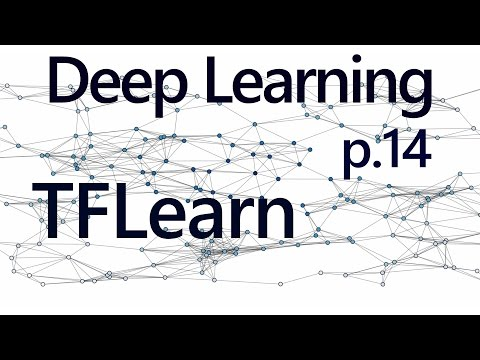

In [8]:
YouTubeVideo('NMd7WjZiCzc')

I just want to become familiar with the tflearn syntax and see the code running live. I know what the inputs look like and what the output accuracy should look like already.

## Gathering Data
The tflearn library comes with an tflearn.datasets.mnist.load\_data() method which automatically extracts x, y, x_test, and y_test for us. Sentdoex does a weird thing with the np.reshape() command which I need to understand a bit better.

In [22]:
# Extract data from mnist.load_data()
x, y, x_test, y_test = mnist.load_data(one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [36]:
# View shapes of data sets
print 'x has shape {}'.format(x.shape)
print 'y has shape {}'.format(y.shape)
print 'x_test has shape {}'.format(x_test.shape)
print 'y_test has shape {}'.format(y_test.shape)

x has shape (55000, 28, 28, 1)
y has shape (55000, 10)
x_test has shape (10000, 784)
y_test has shape (10000, 10)


It looks like each sample (55k samples in the training set and 10k samples in the test set). Let's just try to output 1 image if we can.

In [37]:
# Get first image of training set
x_first = x[0]
print 'x_first has shape {}'.format(x_first.shape)

x_first has shape (28, 28, 1)


In [38]:
# View array of x_first
x_first

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [

In [39]:
# Reshape the array into 28 x 28 array (2-dimensional array)
x_first_reshaped = x_first.reshape((28, 28))
print 'x_first_reshaped has the shape {}'.format(x_first_reshaped.shape)

x_first_reshaped has the shape (28, 28)


In [40]:
# View array of x_first_reshaped
x_first_reshaped

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

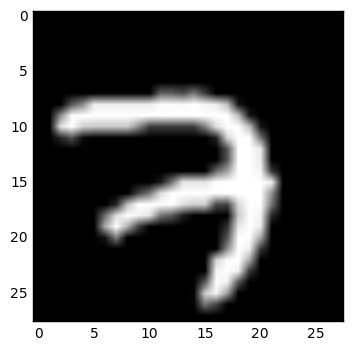

In [41]:
# Plot
plt.imshow(x_first_reshaped, cmap='gray')
plt.show()

Okay, so it's a 7. Here, we reshaped the data from being a _**single array of 784 elements**_ to _**28 arrays of 28 elements each**_.
- 28 arrays (rows of pixels in the image)
    - of 28 elements (pixels in each rows)

So if we back up all the way to just x, x has the shape 55000, 784
- 55000 arrays (each photo)
    - of 784 elements (all pixels of each pixels flattened into one array)
    
And sentdex reshapes it to [-1, 28, 28, 1]

In [44]:
# Reshape x
x_reshaped = x.reshape([-1, 28, 28, 1])
print 'x_reshaped has the shape {}'.format(x_reshaped.shape)

x_reshaped has the shape (55000, 28, 28, 1)


Here, I'm a bit confused as to exactly what the 4 elements in reshape are. Through a bit of research, I've learned that the -1 input means "unknown / undisclosed parameter" which will be figured out by the rest of the parameters.
- E.g. If I were trying to reshape an array of 10 elements into something like (-1, 2), the resulting shape would be 5 rows of 2 elements (5 was inferred by 10 / 2)
- E.g. If I were trying to reshape an array of 10 elements into something like (2, -1), the resulting shape would be 2 rows of 5 elements)

If I try to break it down _**backwards**_ in this way (1, 28, 28, -1)
- 55000 arrays (each photo)
    - of 28 arrays (rows of pixels in the image)
        - of 28 arrays (columns of pixels in each row of the image)
            - of 1 element (each pixel of each column of each row of each image)

In [46]:
# Get first reshaped image of x
x_reshaped_first = x_reshaped[0]

In [47]:
# View x_reshaped_first
x_reshaped_first

array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [

I think I'm right...

In [48]:
# Reshape x_test_reshaped
x_test_reshaped = x_test.reshape([-1, 28, 28, 1])
print 'x_test_reshaped has the shape {}'.format(x_test_reshaped.shape)

x_test_reshaped has the shape (10000, 28, 28, 1)


## Build Model

In [4]:
# sentdex's code to build the neural net using tflearn
#   Input layer --> conv layer w/ max pooling --> conv layer w/ max pooling --> fully connected layer --> output layer
convnet = input_data(shape = [None, 28, 28, 1], name = 'input')

convnet = conv_2d(convnet, 32, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation = 'relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation = 'relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 10, activation = 'softmax')
convnet = regression(convnet, optimizer = 'adam', learning_rate = 0.01, loss = 'categorical_crossentropy', name = 'targets')

In [5]:
model = tflearn.DNN(convnet)
model.fit(
    {'input': x}, 
    {'targets': y}, 
    n_epoch = 10, 
    validation_set = ({'input': x_test}, {'targets': y_test}), 
    snapshot_step = 500, 
    show_metric = True, 
    run_id = 'mnist'
)

Training Step: 8599  | total loss: 0.04597 | time: 322.249s
| Adam | epoch: 010 | loss: 0.04597 - acc: 0.9864 -- iter: 54976/55000
Training Step: 8600  | total loss: 0.04166 | time: 338.912s
| Adam | epoch: 010 | loss: 0.04166 - acc: 0.9877 | val_loss: 0.08756 - val_acc: 0.9761 -- iter: 55000/55000
--


This took _**ONE HOUR**_, by the way...

## Test Model
Let's try to predict on the first test sample.

In [49]:
# Get first reshaped image of x_test_reshaped
x_test_reshaped_first = x_test_reshaped[0]

In [66]:
# Try to predict using model
y_test_pred_first = np.argmax(model.predict([x_test_reshaped_first]))

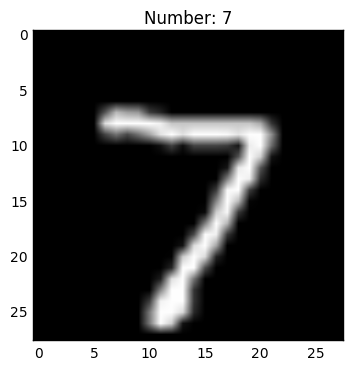

In [67]:
# Plot
plt.title('Number: {}'.format(y_test_pred_first))
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

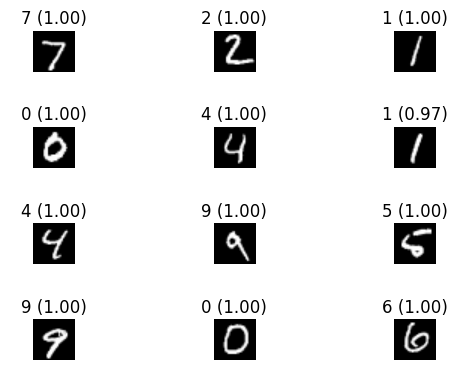

In [89]:
# Iterate and predict the first 12 samples
images_to_plot = 12

fig, ax = plt.subplots(nrows = 4, ncols = int(math.ceil(images_to_plot / 4)))

i = 0
for row in ax:
    for col in row:
        y_test_pred_one_hot = model.predict([x_test_reshaped[i]])
        y_test_pred_proba = np.max(y_test_pred_one_hot)
        y_test_pred = np.argmax(y_test_pred_one_hot)
        
        col.set_title('{} ({})'.format(y_test_pred, '%.2f' % y_test_pred_proba))
        col.imshow(x_test[i].reshape(28, 28), cmap='gray')
        col.set_axis_off()
        
        i += 1

plt.tight_layout()
plt.show()

Sweet, it works pretty well! I'm probably ready for a random face detection task!